# Model Used

1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. XGBRegressor
5. Bayesian Ridge
6. Extra Trees Regressor
7. Ada Boost Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
data=pd.read_csv("../input/climate-change-effect-crop/climate-ds.csv")

In [3]:
data

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,Albania,Maize,1990,1485,121.00,16.37,36613
1,1,Albania,Potatoes,1990,1485,121.00,16.37,66667
2,2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333
3,3,Albania,Sorghum,1990,1485,121.00,16.37,12500
4,4,Albania,Soybeans,1990,1485,121.00,16.37,7000
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,657,2550.07,19.76,22581
28238,28238,Zimbabwe,Sorghum,2013,657,2550.07,19.76,3066
28239,28239,Zimbabwe,Soybeans,2013,657,2550.07,19.76,13142
28240,28240,Zimbabwe,Sweet potatoes,2013,657,2550.07,19.76,22222


In [4]:
data.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'hg/ha_yield'],
      dtype='object')

In [5]:
data.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
 7   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ MB


In [7]:
data['Area'].value_counts()

India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Japan          966
              ... 
Estonia         42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: Area, Length: 101, dtype: int64

In [8]:
data['Item'].value_counts()

Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: Item, dtype: int64

In [9]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print(len(out))

iqr_outliers(data['Year'])
iqr_outliers(data['average_rain_fall_mm_per_year'])
iqr_outliers(data['pesticides_tonnes'])
iqr_outliers(data['avg_temp'])


0
0
1418
1452


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
model_trans = LabelEncoder()
data['Area'] = model_trans.fit_transform(data['Area'])
data['Item'] = model_trans.fit_transform(data['Item'])

In [12]:
data

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,0,1,1990,1485,121.00,16.37,36613
1,1,0,3,1990,1485,121.00,16.37,66667
2,2,0,4,1990,1485,121.00,16.37,23333
3,3,0,5,1990,1485,121.00,16.37,12500
4,4,0,6,1990,1485,121.00,16.37,7000
...,...,...,...,...,...,...,...,...
28237,28237,100,4,2013,657,2550.07,19.76,22581
28238,28238,100,5,2013,657,2550.07,19.76,3066
28239,28239,100,6,2013,657,2550.07,19.76,13142
28240,28240,100,7,2013,657,2550.07,19.76,22222


Text(0.5, 1.0, 'Correlation coefficient between different features and hg/ha_yield')

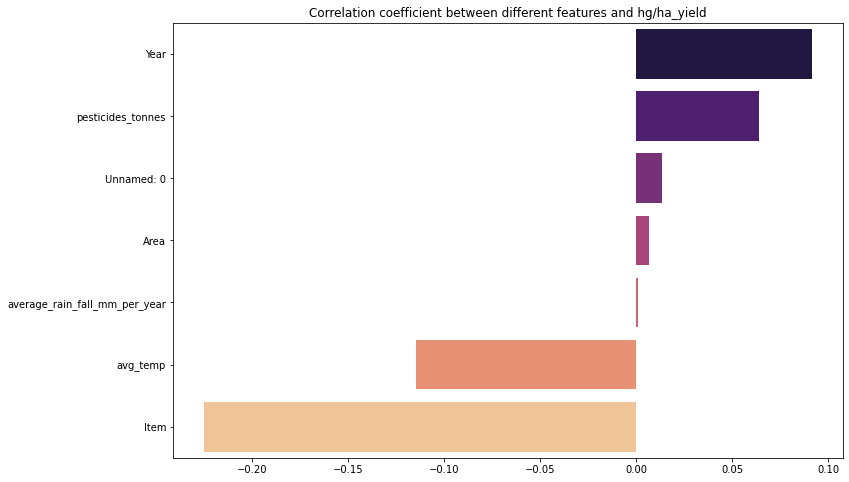

In [13]:
plt.figure(figsize=(12,8))
correlation = data.corr()["hg/ha_yield"].sort_values(ascending=False)
indices = correlation.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(correlation[i])
sns.barplot(x=corr, y=labels, palette='magma')
plt.title('Correlation coefficient between different features and hg/ha_yield')

In [14]:
data.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'hg/ha_yield'],
      dtype='object')

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
data['Unnamed: 0'] = scaler.fit_transform(data['Unnamed: 0'].values.reshape(-1,1))
data['Area'] = scaler.fit_transform(data['Area'].values.reshape(-1,1))
data['Item'] = scaler.fit_transform(data['Item'].values.reshape(-1,1))
data['Year'] = scaler.fit_transform(data['Year'].values.reshape(-1,1))
data['average_rain_fall_mm_per_year'] = scaler.fit_transform(data['average_rain_fall_mm_per_year'].values.reshape(-1,1))
data['pesticides_tonnes'] = scaler.fit_transform(data['pesticides_tonnes'].values.reshape(-1,1))
data['avg_temp'] = scaler.fit_transform(data['avg_temp'].values.reshape(-1,1))


In [16]:
data

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,-1.731989,-1.734041,-1.298110,-1.637075,0.473294,-0.616366,-0.661069,36613
1,-1.731867,-1.734041,-0.539181,-1.637075,0.473294,-0.616366,-0.661069,66667
2,-1.731744,-1.734041,-0.159716,-1.637075,0.473294,-0.616366,-0.661069,23333
3,-1.731622,-1.734041,0.219749,-1.637075,0.473294,-0.616366,-0.661069,12500
4,-1.731499,-1.734041,0.599214,-1.637075,0.473294,-0.616366,-0.661069,7000
...,...,...,...,...,...,...,...,...
28237,1.731499,1.995503,-0.159716,1.624512,-0.693232,-0.575853,-0.123991,22581
28238,1.731622,1.995503,0.219749,1.624512,-0.693232,-0.575853,-0.123991,3066
28239,1.731744,1.995503,0.599214,1.624512,-0.693232,-0.575853,-0.123991,13142
28240,1.731867,1.995503,0.978678,1.624512,-0.693232,-0.575853,-0.123991,22222


<AxesSubplot:>

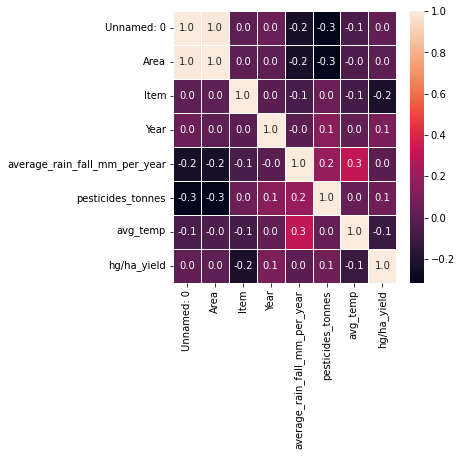

In [17]:
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X= data.drop(['hg/ha_yield'] , axis = 1).values
y= data['hg/ha_yield' ].values

In [20]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size= 0.25 , random_state=42)

# DecisionTreeRegressor

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor()
Regressor.fit(x_train, y_train)
yhat = Regressor.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3837.033


In [22]:
from sklearn.metrics import r2_score
R2_Decision_Tree = r2_score(y_test,yhat)
print('R2: %.3f' %R2_Decision_Tree)

R2: 0.975


In [23]:
print(Regressor.score(x_train, y_train))

1.0


In [24]:
ACC_Decision=Regressor.score(x_test, y_test)
print(Regressor.score(x_test, y_test))

0.9747074401528272


# RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor 
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(x_train, y_train )
yhat = forest_model.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 7547.264


In [26]:
R2_Random_Forest = r2_score(y_test,yhat)
print('R2: %.3f' %R2_Random_Forest)

R2: 0.974


In [27]:
print(forest_model.score(x_train, y_train))

0.9834241093407713


In [28]:
ACC_Random_Forest=Regressor.score(x_test, y_test)
print(forest_model.score(x_test, y_test))

0.9737112551889503


# XGBRegressor

In [29]:
from xgboost.sklearn import XGBRegressor
xgbRegressor = XGBRegressor()
xgbRegressor.fit(x_train, y_train)
yhat = xgbRegressor.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 8223.291


In [30]:
R2_XGB = r2_score(y_test,yhat)
print('R2: %.3f' %R2_XGB)

R2: 0.970


In [31]:
print(xgbRegressor.score(x_train, y_train))

0.9858305728088887


In [32]:
ACC_XGB=xgbRegressor.score(x_test, y_test)
print(xgbRegressor.score(x_test, y_test))

0.9702392720623684


# BayesianRidge

In [33]:
from sklearn.linear_model import BayesianRidge

brRegressor = BayesianRidge()
brRegressor.fit(x_train, y_train)
yhat = brRegressor.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 62592.345


In [34]:
print(brRegressor.score(x_train, y_train))

0.08237814844300106


# ExtraTreesRegressor

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit( x_train, y_train)
yhat = reg.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 2793.139


In [36]:
R2_ExtraTrees = r2_score(y_test,yhat)
print('R2: %.3f' %R2_ExtraTrees)

R2: 0.991


In [37]:
print(reg.score(x_train, y_train))

0.9999999999966703


In [38]:
ACC_ExtraTrees=reg.score(x_test, y_test)
print(reg.score(x_test, y_test))

0.9911136377475241


# LinearRegression

In [39]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)
yhat = linear.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 62584.394


In [40]:
print(linear.score(x_train, y_train))

0.08240465181678303


# AdaBoostRegressor

In [41]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=20,learning_rate=0.5)
ada.fit(x_train , y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=20)

In [42]:
ada.score(x_train , y_train )

0.6206268719988512

In [43]:
ACC_Ada=ada.score(x_test , y_test )
ada.score(x_test , y_test )

0.6278582549406692

In [44]:
yhat = ada.predict(x_test)
mae = mean_absolute_error(y_test, yhat)
R2_AdaBoost = r2_score(y_test,yhat)
print('R2: %.3f' %R2_AdaBoost)

R2: 0.628


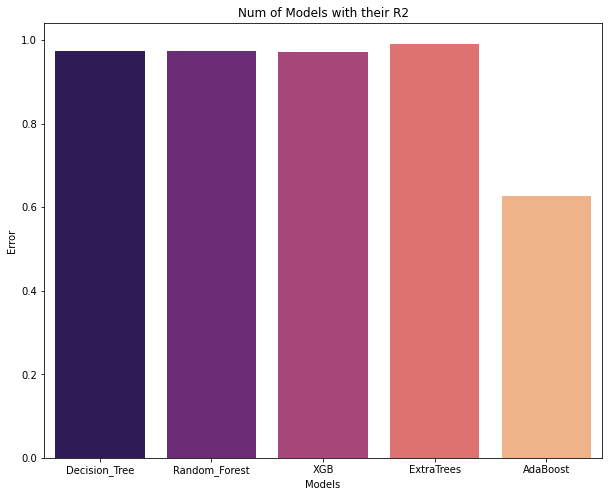

In [45]:
Error = [R2_Decision_Tree , R2_Random_Forest , R2_XGB , R2_ExtraTrees , R2_AdaBoost]
dataPerf = pd.DataFrame(data={'Models': ['Decision_Tree', 'Random_Forest', 'XGB','ExtraTrees','AdaBoost'] ,
                              'Error': Error ,
                              'Accuracy':[ACC_Decision,ACC_Random_Forest,ACC_XGB,ACC_ExtraTrees,ACC_Ada]})

plt.figure(figsize=(10, 8))
sns.barplot(x="Models", y="Error", data=dataPerf, palette="magma")
plt.title('Num of Models with their R2')
plt.show()

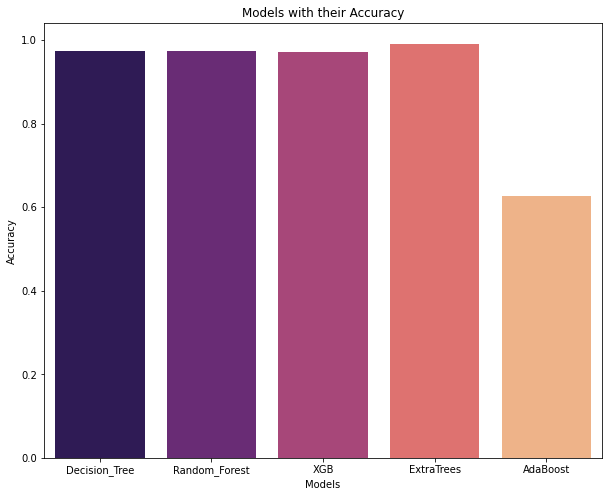

In [46]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Models", y="Accuracy", data=dataPerf, palette="magma")
plt.title('Models with their Accuracy')
plt.show()